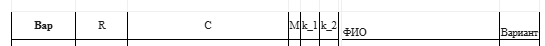

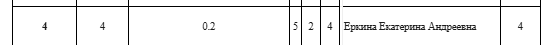

## **Задание 1**

In [82]:
import numpy as np
import matplotlib.pyplot as plt

R = 4
C = 0.2
tau = R * C
T = 0.1
M = 5
k1 = 2
k2 = 4

# временные оси
t1 = np.arange(-1, 4, T)
t2 = np.arange(-2.5, M+5, T)

Если на интервале [0, tau] слишком мало точек дискретизации, можно упустить важную динамику сигнала, а если шаг слишком маленький, то увеличивается объём данных и вычислительная нагрузка. Практика показывает, что 8–10 точек на интервале tau является оптимальным количеством. Тогда найдем T:

 T = tau/8 = 0.1

In [83]:
# функция отклика
h = (1/tau) * np.exp(-t1/tau) * (t1 >= 0)

x4 = np.where((t2 >= 0) & (t2 <= M), 1.0, 0.0)
x5 = np.exp(-k1 * t2) * np.cos(k2 * t2)

# свёртка - функция np.convolve
y1_conv = np.convolve(x4, h)[:len(t2)] * T
y5_conv = np.convolve(x5, h)[:len(t2)] * T

Text(0, 0.5, 'h(n)')

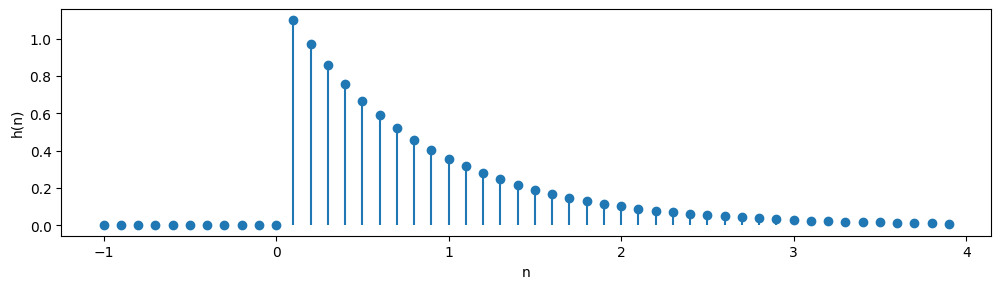

In [84]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.stem(t1, h, basefmt=" ")
plt.xlabel('n')
plt.ylabel('h(n)')

На графике видно, что действительно, h(n) = 0, n < 0 - фильтр физически реализуем.

И, конечно, сумма значений h(n) сходится (достаточное условие устойчивости):

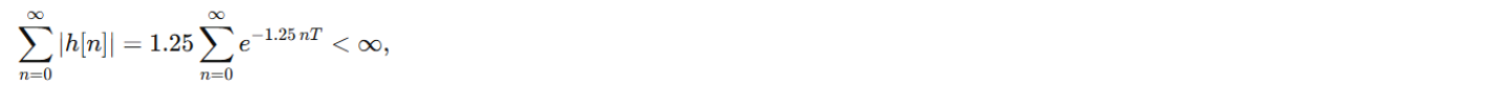

Тут сумма бесконечного геометрического ряда. Значит, полученный дискретный фильтр устойчив.

In [85]:
# передаточная функция и полюс
a = np.exp(-T/tau)
print("H(z) = 1.25*z / (z - {:.4f})".format(a))
print("z = {:.4f}".format(a))

H(z) = 1.25*z / (z - 0.8825)
z = 0.8825


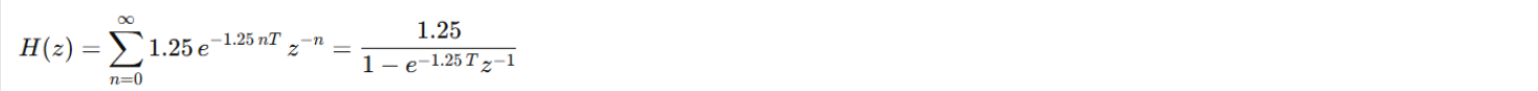

При подстановке T = 0.1 получим в знаменателе значение экспоненты равной примерно 0.8825 - это и есть полюс.

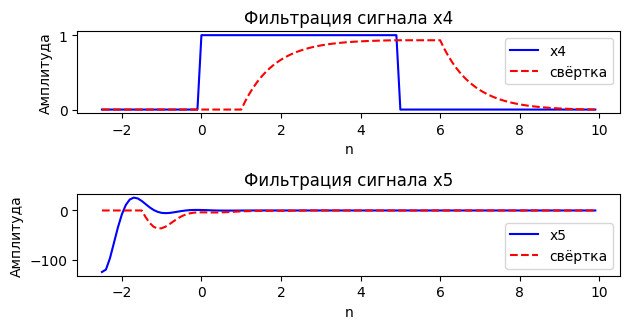

In [86]:
# фильтрация сигнала x4
plt.subplot(3, 1, 2)
plt.plot(t2, x4, 'b-', label='x4')
plt.plot(t2, y1_conv, 'r--', label='свёртка')
plt.title('Фильтрация сигнала x4')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.legend()

# фильтрация сигнала x5
plt.subplot(3, 1, 3)
plt.plot(t2, x5, 'b-', label='x5')
plt.plot(t2, y5_conv, 'r--', label='свёртка')
plt.title('Фильтрация сигнала x5')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()

Фильтр не может мгновенно реагировать на резкие изменения входного сигнала, так как он содержит экспоненту.

In [92]:
# y(n) = exp(-T/tau)*y(n-1) + (1/tau)*x(n)
# y(n) = a*y(n-1) + b*x(n)
a = np.exp(-T/tau)   # коэффициент обратной связи
b = T/tau            # коэффициент входного множителя

In [93]:
def filter(x, a, b):
    y = np.zeros_like(x)
    for n in range(len(x)):
        if n == 0:
            y[n] = b * x[n]
        else:
            y[n] = a * y[n-1] + b * x[n]
    return y

In [94]:
y4_rec = filter(x4, a, b)
y5_rec = filter(x5, a, b)

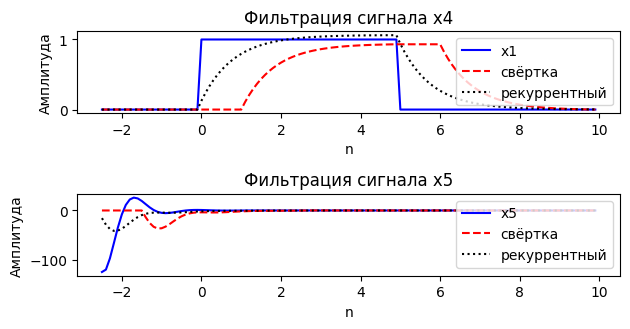

In [95]:
# Фильтрация сигнала x1
plt.subplot(3, 1, 2)
plt.plot(t2, x4, 'b-', label='x1')
plt.plot(t2, y4_conv, 'r--', label='свёртка')
plt.plot(t2, y4_rec, 'k:', label='рекуррентный')
plt.title('Фильтрация сигнала x4')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.legend(loc='upper right')

# Фильтрация сигнала x5
plt.subplot(3, 1, 3)
plt.plot(t2, x5, 'b-', label='x5')
plt.plot(t2, y5_conv, 'r--', label='свёртка')
plt.plot(t2, y5_rec, 'k:', label='рекуррентный')
plt.title('Фильтрация сигнала x5')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

При увеличении T, коэффициент a перед y(n-1) увеличивается, и вклад "предыдущих" значений y(n-1) становится больше. Сам фильтр становится как бы менее затухающим, что приводит к резким скачкам амплитуды на начале горизонтальной оси. Чтобы избежать этого, можно поставить b = T/tau (изначально стояло b = 1/tau).

# **Задание 2**

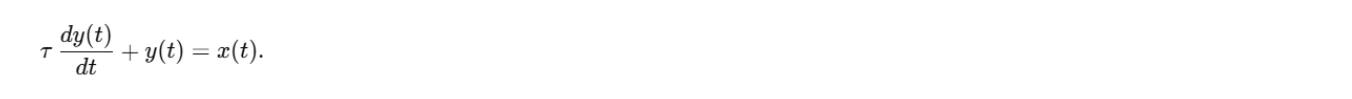

Аппроксимируем производную с помощью метода конечных разностей:

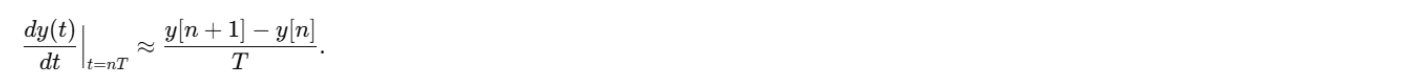

Подставив в уравнение, получим:

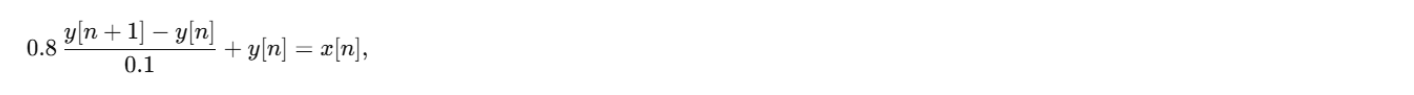

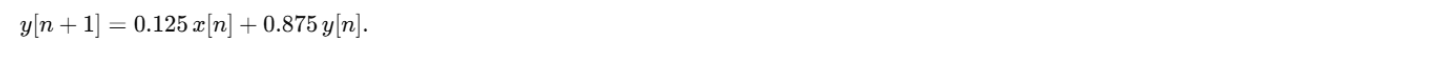

In [96]:
# y[n+1] = (1 - alpha) * y[n] + alpha * x[n] = 0.875 * y[n] + 0.125 * x[n]
alpha = T / tau

In [97]:
def filter2(x, alpha):
    y = np.zeros_like(x)
    for n in range(len(x)-1):
        y[n+1] = (1 - alpha)*y[n] + alpha*x[n]
    return y

In [98]:
y4_diff = filter2(x4, alpha)
y5_diff = filter2(x5, alpha)

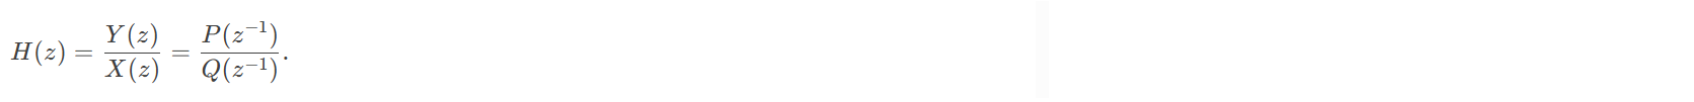

С учетом,что y(n+1)   ---Z--->   zY(z)

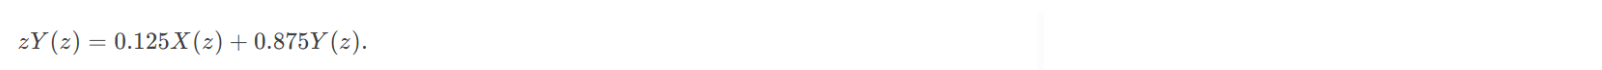

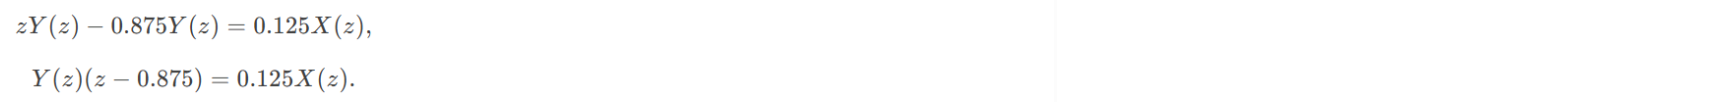

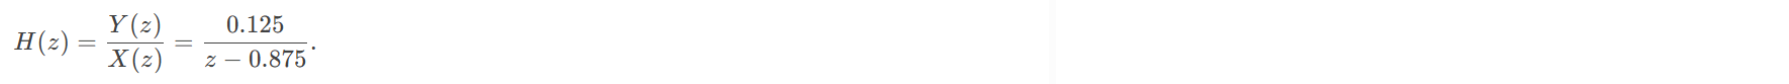

In [121]:
# передаточная функция и полюс
print("H(z) = 0.125 / (z - 0.875)")
print("z = 0.875, находится внутри единичного круга --> фильтр устойчив")

H(z) = 0.125 / (z - 0.875)
z = 0.875, находится внутри единичного круга --> фильтр устойчив


In [133]:
n = np.arange(0, 100)
h_d = alpha * (1 - alpha)**n

Чтобы найти функцию отклика, обратимся к функции, равной 1 при t = 0 и 0 при других t. Это единичный импульс.

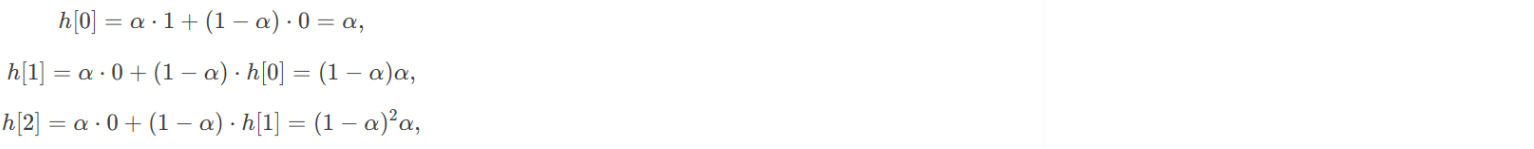

В общем виде получается:

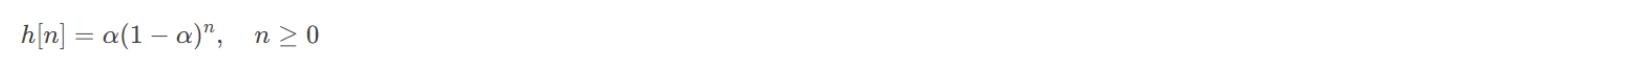

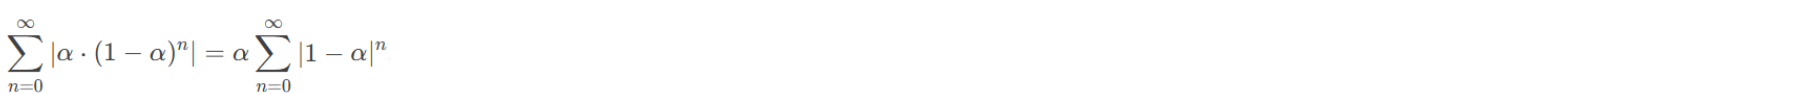

Опять геометрическая прогрессия, значит сумма сходится, и фильтр устойчив.

In [148]:
y4_conv = np.convolve(x4, h)[:len(x4)] * T
y5_conv = np.convolve(x5, h)[:len(x5)] * T

Text(0, 0.5, 'h_d(n)')

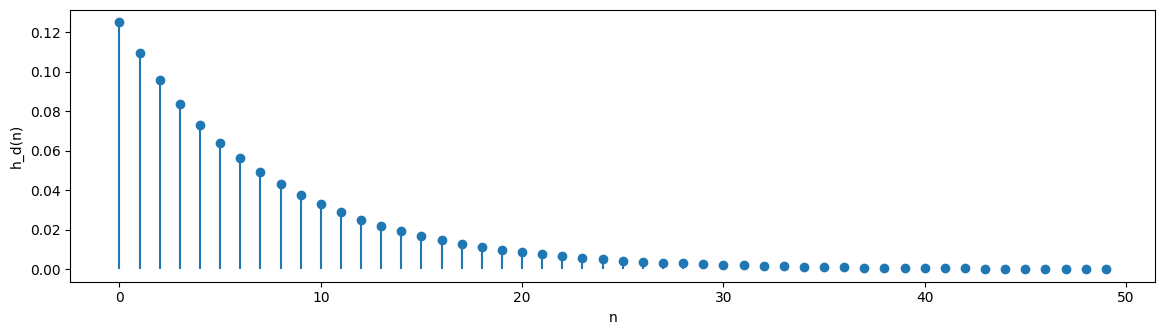

In [147]:
plt.figure(figsize=(14, 12))
plt.subplot(3, 1, 1)
plt.stem(n[:50], h_d[:50], basefmt=" ")
plt.xlabel('n')
plt.ylabel('h_d(n)')

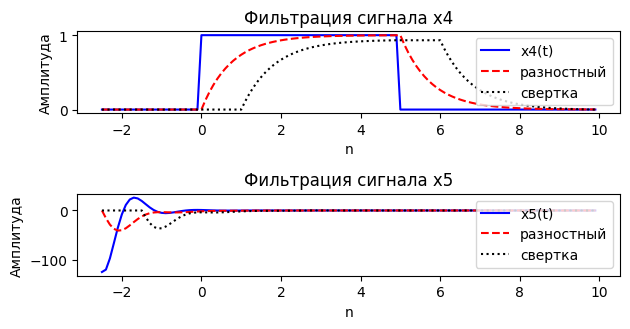

In [153]:
# фильтрация сигнала x4
plt.subplot(3, 1, 2)
plt.plot(t2, x4, 'b-', label='x4(t)')
plt.plot(t2, y4_diff, 'r--', label='разностный')
plt.plot(t2, y4_conv, 'k:', label='свертка')
plt.title('Фильтрация сигнала x4')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.legend(loc='upper right')

#  фильтрация сигнала x5
plt.subplot(3, 1, 3)
plt.plot(t2, x5, 'b-', label='x5(t)')
plt.plot(t2, y5_diff, 'r--', label='разностный')
plt.plot(t2, y5_conv, 'k:', label='свертка')
plt.title('Фильтрация сигнала x5')
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Графики похожи на графики со сверткой и рекуррентным фильтром. График свертки ведет себя более плавно и менее охотнее набирает амплитуду по сравнению с графиком метода разностного уравнения.